In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import pandas.api.types as  ptypes
# from google.colab import files
# uploaded = files.upload()
%matplotlib inline

In [2]:
# read weatherHistory.csv file
dataset = pd.read_csv("weatherHistory.csv")
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
print("\nType of DF: ",type(dataset))
        
# print("\nDescribe Data: \n",df.describe())
print("\nColumns are: \n",dataset.columns)
print("\n Shape of dataset(rows and columns): \n", dataset.shape)


Type of DF:  <class 'pandas.core.frame.DataFrame'>

Columns are: 
 Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

 Shape of dataset(rows and columns): 
 (96453, 12)


In [4]:
# rename column Apparent Temperature
dataset.rename(columns={'Apparent Temperature (C)':'y','Humidity':'x'},inplace = True)

In [5]:
# getting column x and y in dataset
dataset = dataset.loc[:,['y','x']]
dataset.head()

,y,x
0,7.388889,0.89
1,7.227778,0.86
2,9.377778,0.89
3,5.944444,0.83
4,6.977778,0.83


In [6]:
print("\nData type of each column:\n")
dataset.dtypes


Data type of each column:



y    float64
x    float64
dtype: object

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
y,96453.0,10.855029,10.696847,-27.716667,2.311111,12.00,18.838889,39.344444
x,96453.0,0.734899,0.195473,0.000000,0.600000,0.78,0.890000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 2 columns):
y    96453 non-null float64
x    96453 non-null float64
dtypes: float64(2)
memory usage: 1.5 MB


In [9]:
# calculating  sum of null values
dataset.isna().sum()

y    0
x    0
dtype: int64

In [10]:
print("\n check for duplicate \n")
dataset.duplicated().sum()


 check for duplicate 



28998

In [11]:
# # replace  NaN values with mean value
# dataset.replace(np.NaN,dataset.mean(),inplace=True)

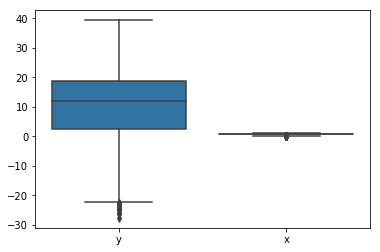

In [12]:
# boxplot to  find outliers of datatset
sb.boxplot(data = dataset)

In [13]:
def feature_scaling(dataset):
    #featurescaling by min, max 
    for name in dataset.columns:
        dataset[name] = (dataset[name] - dataset[name].min()) / (dataset[name].max()-dataset[name].min())
    return dataset

In [14]:
# feature  scaling
dataset = feature_scaling(dataset)

In [15]:
# split dataset into train data and test data
def train_and_test_dataset(dataset):
#         calculate train dataset percentage 
        train_per = int(0.70*len(dataset)) 
        test_per = len(dataset)-train_per
        
#         getting trained data from dataset
        X_train_set = dataset.head(train_per)
#         getting test data for testing train model
        Y_train_set = dataset.tail(test_per)
        return X_train_set,Y_train_set

In [16]:
train,test = train_and_test_dataset(dataset)
train_data = train
test_data = test

<Figure size 432x288 with 0 Axes>

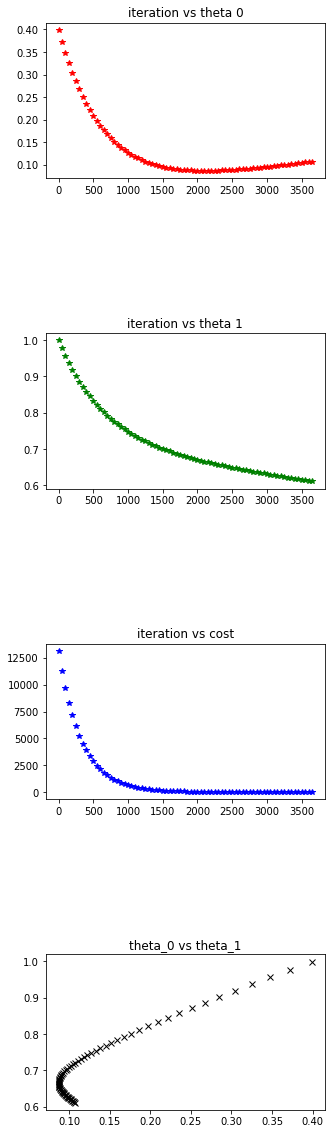

iteration = 3686 and cost function = 7.847003715155505e-05
0.10794351605903345 0.6096792540396259
Accuracy: 65.36464705531361


In [17]:
class LinearRegression:
    def gradient_descent(self,learning_rate,theta_0,theta_1,epoch,x_data,y_data):
        cost = np.empty(0)
        h1 = h2 =0
        fig = plt.figure()
        fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=(5, 20))
        for i in  range(epoch):
            cost = 0
            h1 = 0.0
            h2 = 0.0
            cost_temp = 0.0
            for data  in range(len(x_data)):
                hypo = theta_0 + (theta_1 * x_data[data])
                h1 += (hypo - y_data[data])
                h2 += ((hypo - y_data[data]) * x_data[data])  
                cost += hypo - y_data[data]
    
#           getting minimum cost  function
            cost_temp +=(hypo - y_data[data]) ** 2 
            cost = (1/2 * len(x_data))* cost_temp
            theta_0 = theta_0 - ((learning_rate * h1) / len(x_data))
            theta_1 = theta_1 - ((learning_rate * h2) / len(x_data))
            
#             ploting graphs  on each 50 epochs 
            if(i%50 == 0):
                ax1.plot(i,theta_0,marker='*',color='r')
                ax1.set_title('iteration vs theta 0')
                ax2.plot(i,theta_1,marker='*',color='g')
                ax2.set_title('iteration vs theta 1')
                ax3.plot(i,cost,marker='*',color='b')
                ax3.set_title('iteration vs cost')
                ax4.plot(theta_0,theta_1,marker = 'x', color='black')
                ax4.set_title('theta_0 vs theta_1')
            if(cost<=0.00009): 
                break

        plt.subplots_adjust(hspace=1)
        plt.show()
        print("iteration = {} and cost function = {}".format(i, cost))
        return theta_0,theta_1

    def test(self, x_test_data, theta_0, theta_1):
        y_predict = [0]*len(x_test_data)
        for i in range(len(x_test_data)):
    #             y_predict[i] = theta_1*x_test_data[i] + theta_0
              y_predict[i] = (theta_0 + (theta_1*x_test_data[i]))
        return y_predict

    def accuracy(self, y_test_data, y_predicted):
        diff = 0
        for i in range(len(y_test_data)):
            diff += abs((y_predicted[i] - y_test_data[i])/y_test_data[i])
        diff  =  (diff/len(y_test_data))
        data_accuracy = 1 - diff
        return data_accuracy*100       


def main():
    obj =LinearRegression()
    learning_rate = 0.001
    theta_0 = 0.4
    theat_1 = 1
    epoch = 10000
    x_train_data = np.array(train_data["x"])
    y_train_data = np.array(train_data["y"])

    x_test_data = np.array(test_data["x"])
    y_test_data = np.array(test_data["y"])

#     calculate gradient descent on train data for test data
    t_0, t_1= obj.gradient_descent(learning_rate,theta_0,theat_1,epoch,x_train_data,y_train_data)
    print(t_0,t_1)

#     test data over train data 
    y_prediction_test =obj.test(x_test_data,t_0,t_1)

#     get accuracy of predicted value to original value
    accuracy = obj.accuracy(y_test_data,y_prediction_test)


    print("Accuracy:",accuracy)

if __name__ == '__main__':
    main()

In [18]:
#     learning_rate = 0.001
#     theta_0 = 0.4
#     theat_1 = 1
#     epoch = 10000
# Accuracy: 65.0214641773087